# Phurba Sherpa
 ## project3

In [2]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib


In [3]:
np.set_printoptions(precision=2, suppress=True) #for printing floating point numbers upto  precision 2

## Loading the  CSV dataset

In [130]:
df = pd.read_csv("BlackFriday 2.csv")

In [131]:
df.shape

(537577, 12)

 # dataset columns

In [132]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# first 5 rows to see example observations.

In [133]:
pd.set_option('display.max_columns', 20) # displaying max 20 columns
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Some og the features are numeric and some are categorical, Filtering the categorical features:

In [134]:
df.dtypes[df.dtypes=='object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# numeric features distribution

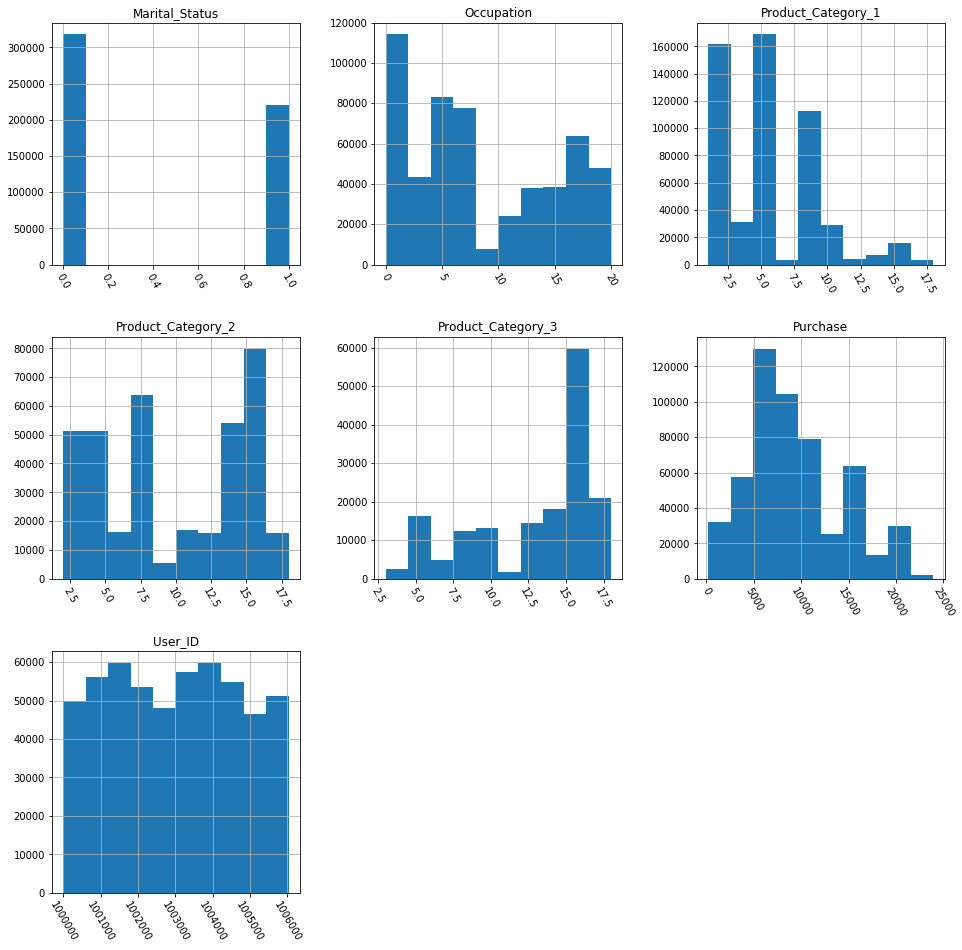

In [135]:
# Ploting histogram grid
df.hist(figsize=(16,16), xrot=-60) # Display the labels rotated by 60 degress

# Clear the text "residue"
plt.show()

### Observations:
we can see the that the highest purchase is range in between 5000 - 10000
there are less married and more married
there are peopels who makes less than 10,000 salary looking at he occupation



## descriptive  statistics for the numerical features.

In [136]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### Obeservation:
the maximum buyer of the 3 product catagory are same which is 18
while the minimum numbers are 1,2and 3 respectively for catagory 1,2and 3
minimum purchase is 185 and highest purchase is 23961


## categorical features distribution

In [15]:
# summary statistics for categorical features.

In [137]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


## Observation:

the values seems to be ok

# Bar plots for categorica datas
Plot bar plot for the Stay_In_Current_City_Years

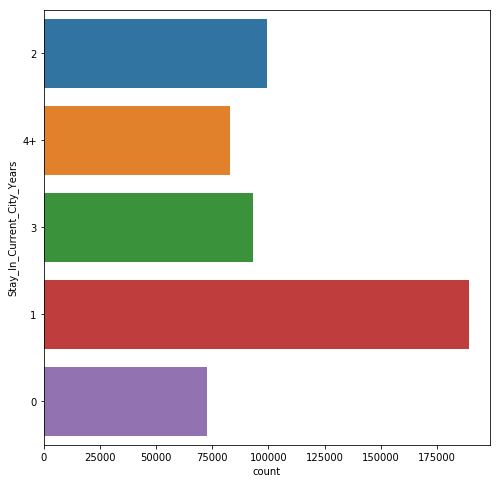

In [138]:
plt.figure(figsize=(8,8))
sns.countplot(y='Stay_In_Current_City_Years', data=df)

# Observations: 
there are more peoples who is living in the city for 1 year.

### Plot bar plot for City_Category

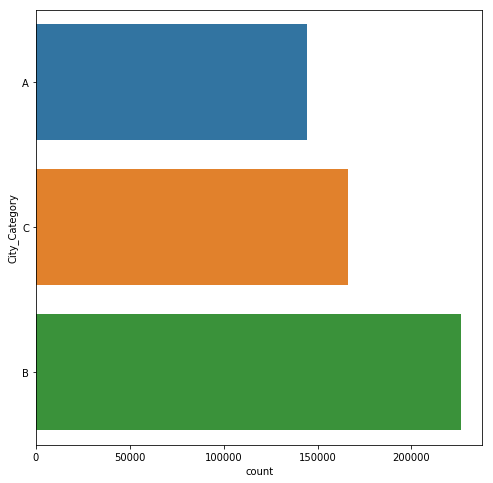

In [139]:
plt.figure(figsize=(8,8))
sns.countplot(y='City_Category', data=df)

### Observations:
we can see that city catagory b has the highest number of population
and then catagory2,3 respetively..


## Segmentations
relation between City_cagtagory and Purchase

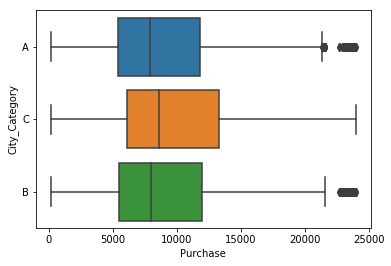

In [28]:
sns.boxplot(y='City_Category', x='Purchase', data=df)

In [106]:
# Observation: it looks like city catagory C has more purchase than the city catagory A and B

# comparing the two property types across other features 

In [140]:
df.groupby('City_Category').mean()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
City_Category,,,,,,,
A,1.002901e+06,7.857306,0.381988,5.437036,9.945026,12.682530,8958.011014
B,1.003033e+06,7.973244,0.407430,5.300420,9.825763,12.674811,9198.657848
C,1.003015e+06,8.427538,0.433955,5.165964,9.779649,12.654322,9844.441855


### Observations :

we can see that city catagory a b and c doesnt have that big diffenrence in the purchase of the products and also oocupation label is also close to each other.


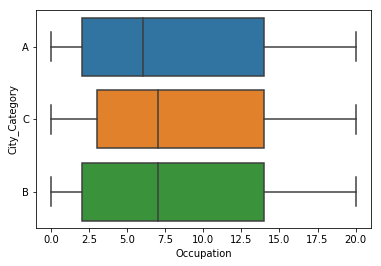

In [110]:
sns.boxplot(y='City_Category', x="Occupation", data=df)

## Segment by City category and display the means and standard deviations within each class

In [31]:
df.groupby('City_Category').agg([np.mean, np.std])

User_ID              Occupation           Marital_Status  \
                       mean          std       mean       std           mean   
City_Category                                                                  
A              1.002901e+06  1776.571039   7.857306  6.715094       0.381988   
B              1.003033e+06  1671.630272   7.973244  6.495510       0.407430   
C              1.003015e+06  1713.958970   8.427538  6.379270       0.433955   

                        Product_Category_1           Product_Category_2  \
                    std               mean       std               mean   
City_Category                                                             
A              0.485875           5.437036  3.727868           9.945026   
B              0.491357           5.300420  3.744983           9.825763   
C              0.495620           5.165964  3.773647           9.779649   

                        Product_Category_3               Purchase               
                    std               mean       std         mean          std  
City_Category                                                                   
A              5.022350          12.682530  4.095707  8958.011014  4866.896600  
B              5.077927          12.674811  4.111198  9198.657848  4927.062965  
C              5.150469          12.654322  4.161494  9844.441855  5109.472100

In [141]:
# c spends more money and a spends less according to 
#the mean purchse where difference between them is not that big

## Correlation

In [27]:
# -1 represent indirect relationship
# +1 shows direct relationship
# 0 shows weak relationship

In [142]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


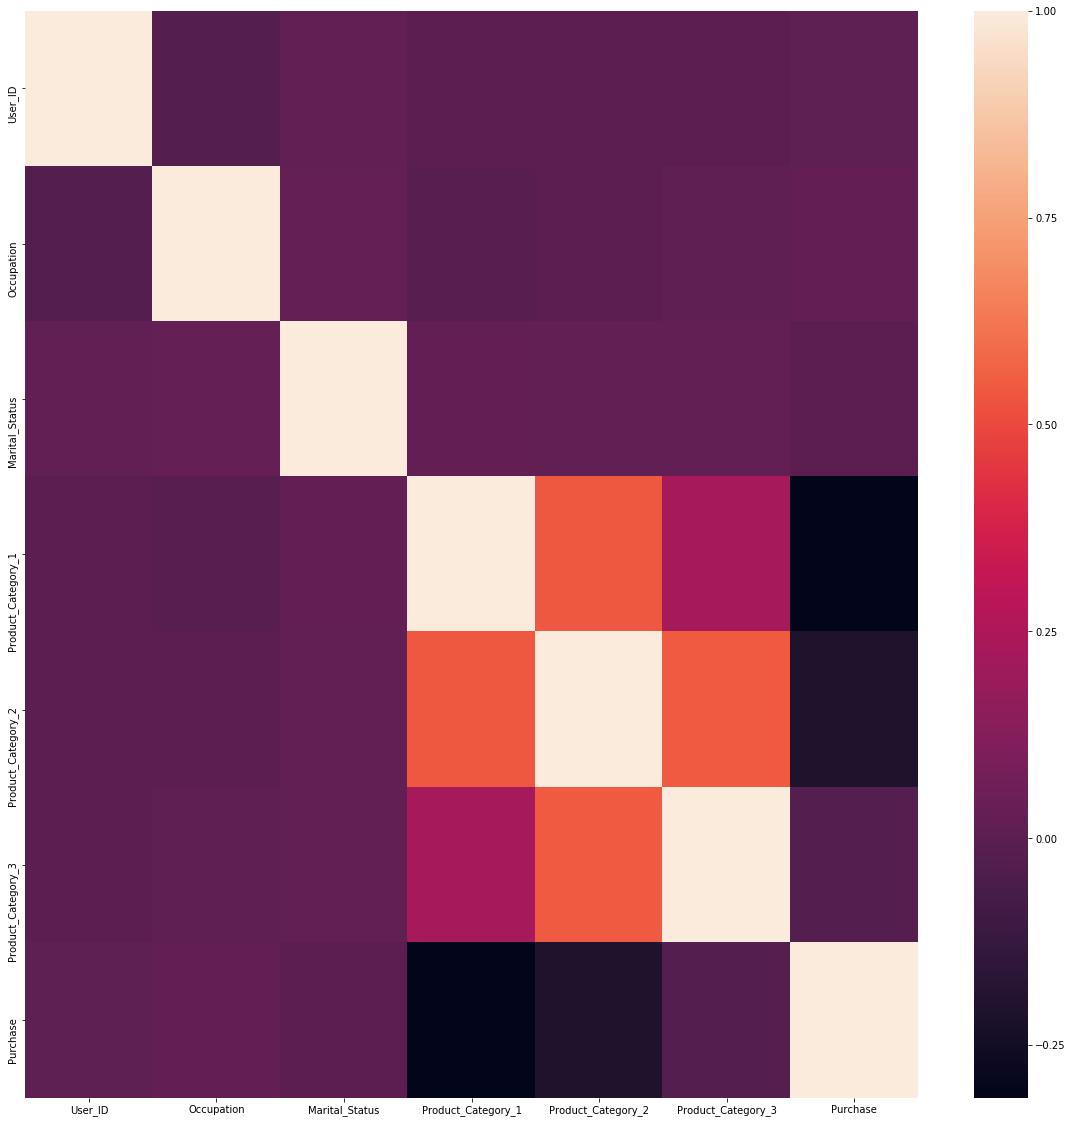

In [143]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

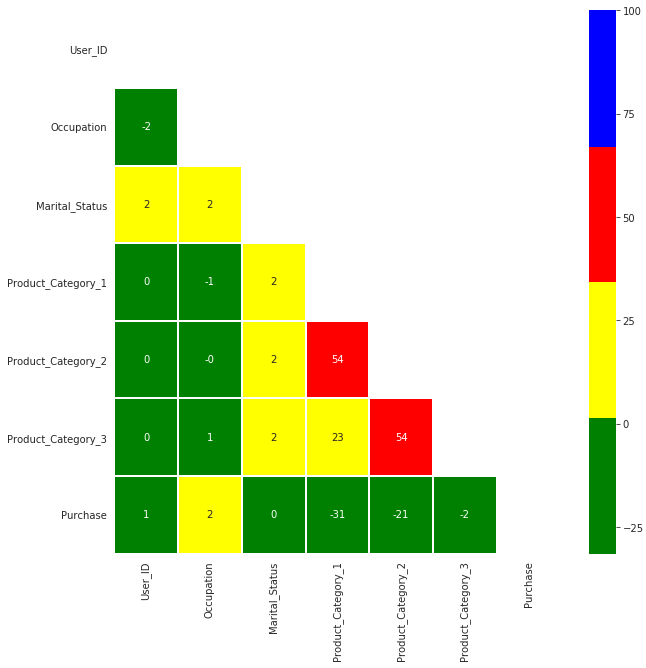

In [144]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# Data Cleaning

In [31]:
# Dropping the duplicates (De-duplication)

In [35]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


In [34]:
# It looks like we didn't have any duplicates in our original dataset. 
# Even so, it's a good idea to check this as an easy first step for cleaning your dataset

## cleaning errors

In [35]:
# Product_catagory_2  feature has some nan values, to handle them:

In [36]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [111]:
# Even though NaN represents "missing" values, those are actually meant to indicate properties without Product_Category_2.
# Fill missing 'Product_Category_2' values with the value 0 to turn 'Product_Category_2' into a true indicator variable

In [37]:
df.Product_Category_2.fillna(0, inplace=True)

In [39]:
df.Product_Category_2.unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [40]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [41]:
df.Product_Category_3.fillna(0, inplace=True)

In [42]:
df.Product_Category_3.unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

## checking for typos and capitalization errors

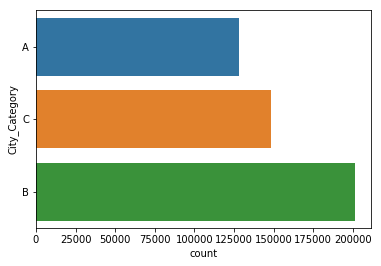

In [112]:
# Class distributions for 'City_Category'
sns.countplot(y='City_Category', data=df)

## mislabeled classes

In [42]:
# checking if there is - datas in stay_in_current_city_years

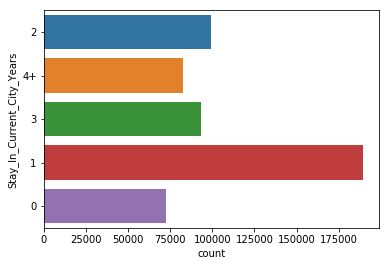

In [145]:
sns.countplot(y='Stay_In_Current_City_Years', data=df)

In [45]:
# Finally, we'll check for classes that are labeled as separate classes when they should really be the same.

# e.g. If 'N/A' and 'Not Applicable' appear as two separate classes, we should combine them.
# let's plot the class distributions for 'exterior_walls':

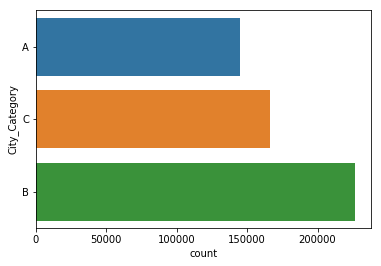

In [45]:
sns.countplot(y='City_Category', data=df)

### Removing Outliers

In [ ]:
# we are using purchase which have possibility of outliers
# Boxplots are a nice way to detect outliers


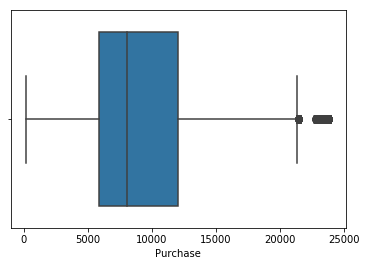

In [147]:
sns.boxplot(df.Purchase)

In [148]:
# checking if there is no value between outliers and the actual data

In [149]:
df.Purchase.sort_values(ascending=False).head()

87440     23961
93016     23961
370891    23961
503697    23960
321782    23960
Name: Purchase, dtype: int64

In [151]:
df = df[df.Purchase<=14000]
df.shape

(427698, 12)

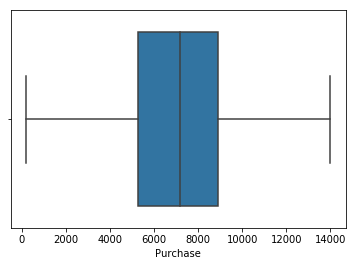

In [152]:
sns.boxplot(df.Purchase)

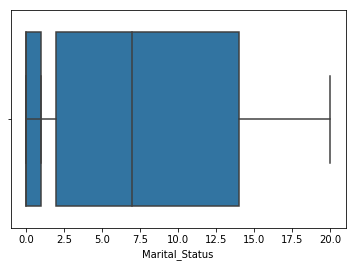

In [47]:
## Checking outliers in size of the house
sns.boxplot(df.Occupation)
sns.boxplot(df.Marital_Status)

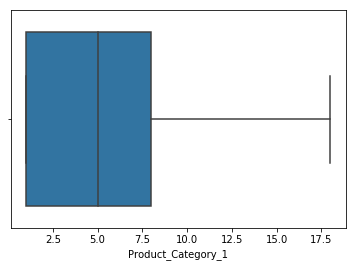

In [49]:
## Checking outliers in lot size
sns.boxplot(df.Product_Category_1)

In [54]:
# Look at the dot on the extreme right. This might indicate some erroneous point.

# Let's look at the largest 5 lot sizes just to confirm.

In [153]:
df.Product_Category_1.sort_values(ascending=False).head()

267247    18
330479    18
426462    18
31616     18
465591    18
Name: Product_Category_1, dtype: int64

In [154]:

df = df[df.Product_Category_1 <=8.0]
df.shape

(382406, 12)

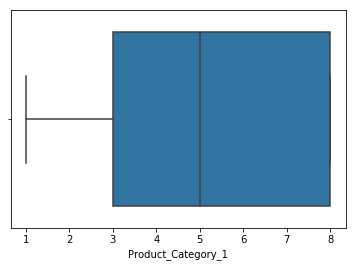

In [155]:
## Plotting the boxplot of lot size after the change
sns.boxplot(df.Product_Category_1)

### putting the missing value in categorical data

In [156]:
#its necessary to consider missing data our dataset becasue it might not give us actual result

In [160]:
# checking for missing data
df.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [162]:
# there is no missing value

### missing values in numerical

In [161]:
# Display number of missing values by numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    128301
Product_Category_3    281284
Purchase                   0
dtype: int64

In [66]:
# Well, it looks like we have mssing numerical features with missing values in this dataset.

### saving cleaned dataset

In [67]:
#we don't have to re-do all the cleaning after saving it..

In [164]:

df.to_csv(r'C:\Users\junakiri\Desktop\cleaneddf.csv', index=False)

# Feature Engineering

In [165]:
df['A_and_singles'] = ((df.City_Category == 'A') & (df.Marital_Status == 0)).astype(int)

In [ ]:
# Display percent of rows

In [166]:

df[df['A_and_singles']==1].shape[0]/df.shape[0]

0.17053602715438565

In [69]:
["Purchase"] = (df.Product_Category_1 < 10) .astype(int)

In [70]:
# Display percent of rows where Purchase == 1
df[df['Purchase']==1].shape[0]/df.shape[0]

1.0

## Create a new feature containing purchse after tax

In [167]:
df['After_tax'] = df.Purchase*1.05

In [79]:
#df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

In [75]:
# Print percent of transactions where during_recession == 1
#df[df['during_recession']==1].shape[0]/df.shape[0]

## removing features which are unusual

In [168]:
df.drop(['Product_ID','User_ID'],axis=1).head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A_and_singles,After_tax
0,F,0-17,10,A,2,0,3,NaN,NaN,8370,1,8788.50
4,M,55+,16,C,4+,0,8,NaN,NaN,7969,0,8367.45
9,M,26-35,20,A,1,1,8,NaN,NaN,7871,0,8264.55
10,M,26-35,20,A,1,1,5,11.0,NaN,5254,0,5516.70
11,M,26-35,20,A,1,1,8,NaN,NaN,3957,0,4154.85


In [82]:
#we removed those two colums because they really dont play role in our data evaluation

In [80]:
#saving dataset

In [ ]:
df.to_csv(r'C:\Users\junakiri\Desktop\cleaneddf.csv', index=False)

## Machine learning models

In [170]:
#splitting train and test data

In [171]:
#separate object for target varialble

In [ ]:
y=df.Purchase
x=df.drop('Purchase',axis=1)

## # splitting x and y into train and test Splits

In [ ]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [134]:
# Let's confirm we have the right number of observations in each subset

In [176]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(382259, 13) (95565, 13) (382259,) (95565,)


# Data standardization

In [136]:
#train and test sets have the same mean and standard deviation
#we should set mean to 0 and 1

In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [ ]:
## Check for mean and std dev.
X_train.describe()

In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [ ]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

# Model 1 - Baseline Model

In [142]:
# In this model, for every test data point, we will simply predict the average of the train labels as the output.
# We will use this simple model to perform hypothesis testing for other complex models.

In [ ]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [ ]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [ ]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Model-2 Ridge Regression

In [ ]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Feature Importance

In [ ]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

In [ ]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

### Support Vector Regression

In [ ]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)


In [ ]:
model.best_estimator_

In [ ]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

In [160]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

### Random Forest Regression

In [ ]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)


In [ ]:
model.best_estimator_

In [ ]:
## Predicting Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predicting Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

### Feature Importance

In [ ]:
# the model again with the best hyperparameter
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

In [ ]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

### XGBoost Regression

In [ ]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))